# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from IPython.display import display, Markdown
from api_keys import api_key
from citipy import citipy
from pprint import pprint 

In [2]:
with open('../Readme.md', 'r') as fh:
    content = fh.read()
    
display(Markdown(content))

# Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Data Boot Camp Â© 2018. All Rights Reserved.


## Generate Cities List

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
cities = []
np.random.seed(9001)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [5]:
cities_pd = pd.DataFrame({"City": cities, "Cloudiness":"", "Country":"", 
                          "Date":"", "Humidity":"", "Lat":"", "Lng":"", "Max_Temp":"", "Wind_Speed":""})

In [8]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
for index, row in cities_pd.iterrows():
    try:
        city = cities[index]
        print(f"Processing data for {city} ...")
        response = requests.get(query_url + city).json()
        cities_pd.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_pd.loc[index, "Country"] = response["sys"]["country"]
        cities_pd.loc[index, "Date"] = response["dt"]
        cities_pd.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_pd.loc[index, "Lat"] = response["coord"]["lat"]
        cities_pd.loc[index, "Lng"] = response["coord"]["lon"]
        cities_pd.loc[index, "Max_Temp"] = response["main"]["temp_max"]
        cities_pd.loc[index, "Wind_Speed"] = response["wind"]["speed"]
        
    except:
        print("City Not Found")

Processing data for east london ...
Processing data for kenai ...
Processing data for yar-sale ...
Processing data for hilo ...
Processing data for pangnirtung ...
Processing data for port elizabeth ...
Processing data for vaitupu ...
City Not Found
Processing data for kazalinsk ...
City Not Found
Processing data for lavrentiya ...
Processing data for metro ...
Processing data for aksu ...
Processing data for pastavy ...
Processing data for rikitea ...
Processing data for hermanus ...
Processing data for taolanaro ...
City Not Found
Processing data for porto nacional ...
Processing data for narsaq ...
Processing data for port alfred ...
Processing data for longyearbyen ...
Processing data for barrow ...
Processing data for arraial do cabo ...
Processing data for yellowknife ...
Processing data for bandar-e anzali ...
Processing data for jacksonville ...
Processing data for san patricio ...
Processing data for ulety ...
Processing data for punta arenas ...
Processing data for katobu ...

Processing data for northam ...
Processing data for moengo ...
Processing data for tumannyy ...
City Not Found
Processing data for san cristobal ...
Processing data for matay ...
Processing data for shenkursk ...
Processing data for thinadhoo ...
Processing data for port lincoln ...
Processing data for zeya ...
Processing data for limbang ...
Processing data for shelburne ...
Processing data for louisbourg ...
City Not Found
Processing data for chicama ...
Processing data for beringovskiy ...
Processing data for umm kaddadah ...
Processing data for bac lieu ...
City Not Found
Processing data for kemijarvi ...
City Not Found
Processing data for isla mujeres ...
Processing data for bilma ...
Processing data for barentsburg ...
City Not Found
Processing data for nizwa ...
Processing data for khelyulya ...
Processing data for grand river south east ...
City Not Found
Processing data for diego de almagro ...
Processing data for victoria ...
Processing data for nantucket ...
Processing data 

Processing data for mount isa ...
Processing data for lucapa ...
Processing data for dingle ...
Processing data for treinta y tres ...
Processing data for farsund ...
Processing data for qingdao ...
Processing data for krumovgrad ...
Processing data for borgarnes ...
Processing data for brockville ...
Processing data for kommunar ...
Processing data for lafia ...
Processing data for verkhnyaya toyma ...
Processing data for alta floresta ...
Processing data for leamington ...
Processing data for vestmannaeyjar ...
Processing data for novoorsk ...
Processing data for loralai ...
Processing data for annau ...
Processing data for ust-nera ...
Processing data for ilhabela ...
Processing data for noyabrsk ...
Processing data for macherla ...
Processing data for ksenyevka ...
City Not Found
Processing data for paka ...
Processing data for salta ...
Processing data for elbasan ...
Processing data for shugurovo ...
Processing data for los llanos de aridane ...
Processing data for champerico ...

In [161]:
!echo %cd% 

C:\Users\12243\Desktop\NUCHI201905DATA2-master\New folder\06-Python-APIs\Homework\starter_code 


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
cities_pd1.to_csv(r'C:\Users\12243\Desktop\NUCHI201905DATA2-master\New folder\06-Python-APIs\Homework\starter_code\cities.csv', index = None)

In [167]:
cities_pd1_data = pd.read_csv("cities.csv") 
df = pd.read_csv("cities.csv")
cities_pd1.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max_Temp      548
Wind_Speed    548
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

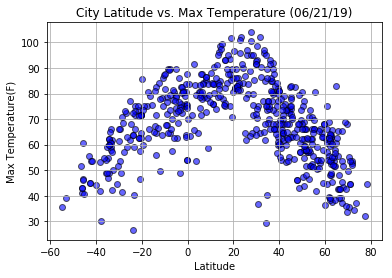

In [149]:
latitude = df["Lat"]
max_temp = df["Max_Temp"]

x_axis = latitude
y_axis = max_temp

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",alpha=".6")
plt.title("City Latitude vs. Max Temperature (06/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.savefig('Lat_Vs_MaxTemp.png')
plt.show()

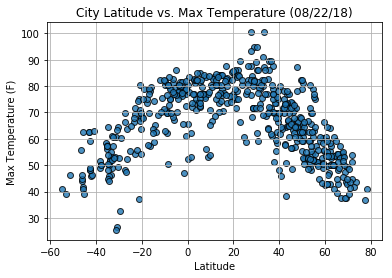

In [6]:
City Latitude vs. Max Temperature

#### Latitude vs. Humidity Plot

In [147]:
df['Humidity'].max()

290

In [148]:
df.loc[df['Humidity'] == 290,:]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
259,talara,0,PE,1561152827,290,-4.58,-81.27,62.6,12.75


In [115]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "talara").json()
response

{'coord': {'lon': -81.27, 'lat': -4.58},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 62.6,
  'pressure': 1010,
  'humidity': 290,
  'temp_min': 62.6,
  'temp_max': 62.6},
 'visibility': 10000,
 'wind': {'speed': 14.99, 'deg': 180},
 'clouds': {'all': 0},
 'dt': 1561156675,
 'sys': {'type': 1,
  'id': 8685,
  'message': 0.0112,
  'country': 'PE',
  'sunrise': 1561116668,
  'sunset': 1561159348},
 'timezone': -18000,
 'id': 3691582,
 'name': 'Talara',
 'cod': 200}

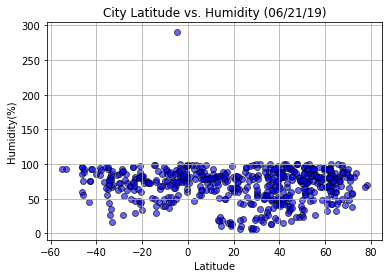

In [150]:
latitude = df["Lat"]
humidity = df["Humidity"]

x_axis = latitude
y_axis = humidity

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",alpha=".6")
plt.title("City Latitude vs. Humidity (06/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig('Lat_Vs_Humidity.png')
plt.show()

#### Decided to leave the proofing to that data point near the 300 mark before showing the plot, couldn't believe it myself... 
#### If you remove that data point the plot looks very similar to the plot below...


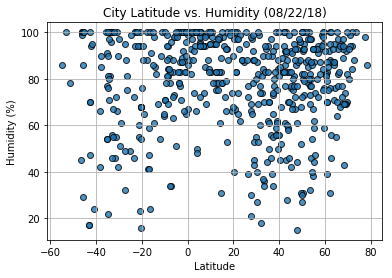

#### Latitude vs. Cloudiness Plot

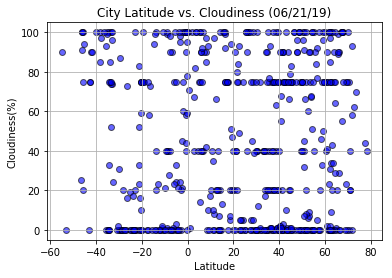

In [151]:
latitude = df["Lat"]
cloudiness = df["Cloudiness"]

x_axis = latitude
y_axis = cloudiness

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",alpha=".6")
plt.title("City Latitude vs. Cloudiness (06/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig('Lat_Vs_Cloudiness.png')
plt.show()

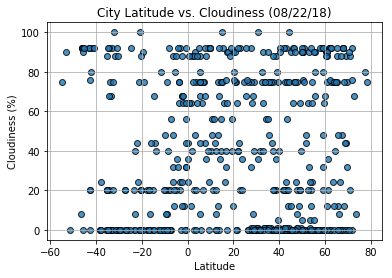

#### Latitude vs. Wind Speed Plot

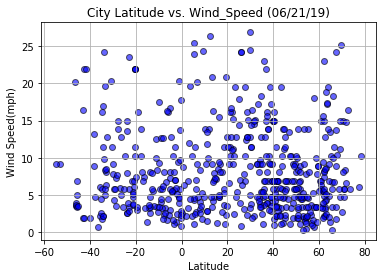

In [152]:
latitude = df["Lat"]
wind_speed = df["Wind_Speed"]

x_axis = latitude
y_axis = wind_speed

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",alpha=".6")
plt.title("City Latitude vs. Wind_Speed (06/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()
plt.savefig('Lat_Vs_windSpeed.png')
plt.show()

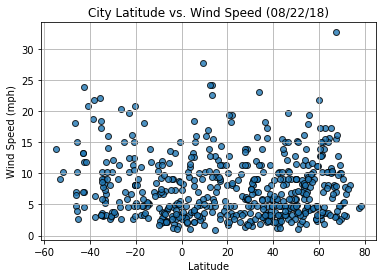